In [11]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from atusfunclib import load_data
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import skewnorm

In [13]:
# Import all data
data_import = load_data(loc='data')

In [14]:
# Unpack individual dataframes
df, dfactcodes, dfeducodes, dfinccodes, dfagecodes, \
dfempcodes, dfindcodes, dfraccodes, dfloccodes, dfwhocodes = data_import

In [28]:
# Convert category columns to float
df['TEAGE_CAT'] = df['TEAGE_CAT'].astype(float)
df['TRERNWA_CAT'] = df['TRERNWA_CAT'].astype(float)

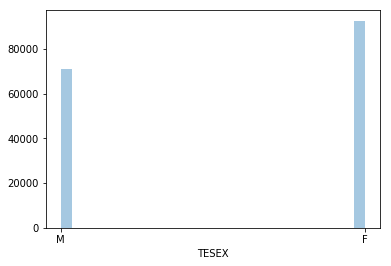

In [29]:
# Distribution plot sex
p = sns.distplot(df[df.TEAGE >= 18]['TESEX'], kde=False)
p.set(xticks=[1,2])
p.set_xticklabels(['M', 'F'])
plt.show()

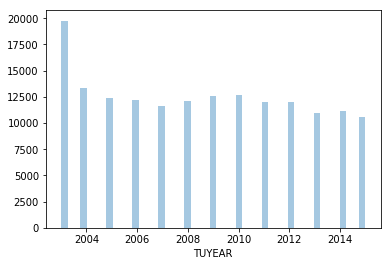

In [30]:
# Distribution plot survey year
p = sns.distplot(df[df.TEAGE >= 18]['TUYEAR'], kde=False)
plt.show()

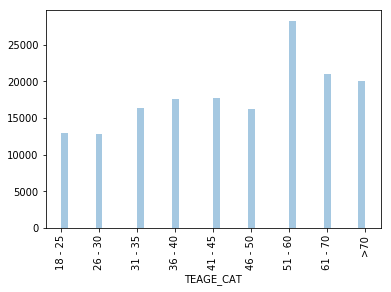

In [31]:
# Distribution plot age group
p = sns.distplot(df[df.TEAGE >= 18]['TEAGE_CAT'], kde=False)
p.set_xticklabels(dfagecodes.NAME.values,
                  rotation=90)
plt.show()

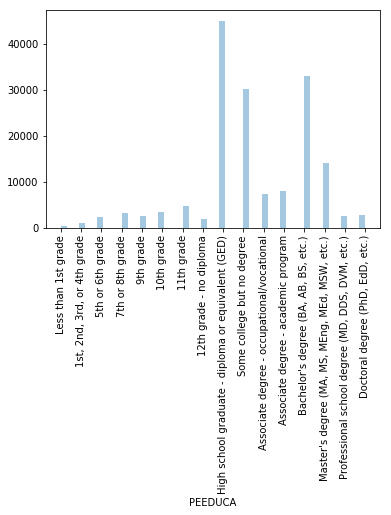

In [32]:
# Distribution plot education group
p = sns.distplot(df[df.TEAGE >= 18]['PEEDUCA'], kde=False)
p.set(xticks=range(31,47))
p.set_xticklabels(dfeducodes.NAME.values,
                  rotation=90)
plt.show()

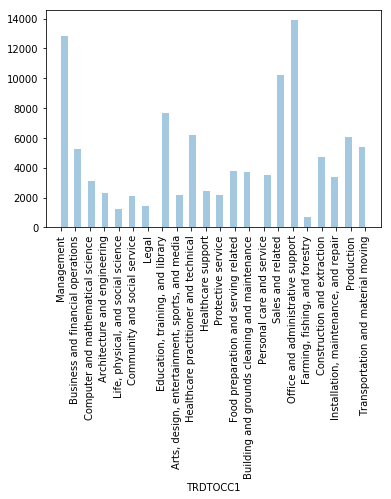

In [33]:
# Distribution plot occupation group
p = sns.distplot(df[df.TEAGE >= 18]['TRDTOCC1'].dropna(), kde=False)
p.set(xticks=range(1,23))
p.set_xticklabels([s[:-12] for s in dfindcodes.NAME.values],
                  rotation=90)
plt.show()

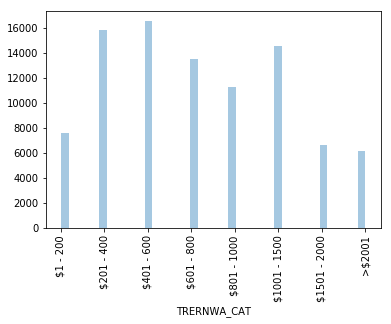

In [34]:
# Distribution plot income group
p = sns.distplot(df[df.TEAGE >= 18]['TRERNWA_CAT'].dropna(), kde=False)
p.set(xticks=range(1,9))
p.set_xticklabels(dfinccodes.NAME.values,
                  rotation=90)
plt.show()

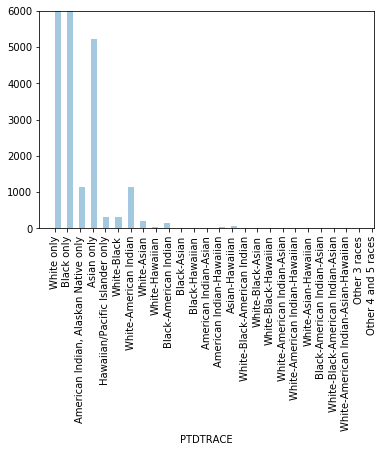

In [65]:
# Distribution plot by race
p = sns.distplot(df[df.TEAGE >= 18]['PTDTRACE'].dropna(), kde=False)
p.set(xticks=range(1,27))
p.set_xticklabels(dfraccodes.NAME2012.values,
                  rotation=90)
p.set(ylim=(0, 6000))
plt.show()

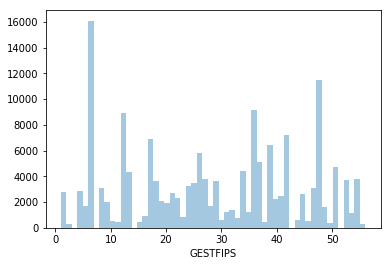

In [36]:
# Distribution plot by state
p = sns.distplot(df[df.TEAGE >= 18]['GESTFIPS'].dropna(), kde=False, bins=56)
plt.show()

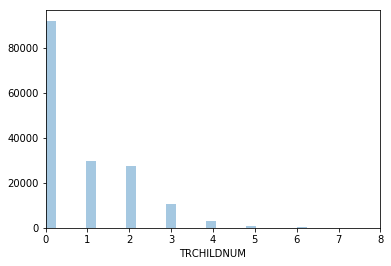

In [37]:
# Distribution plot by number of HH children <18
p = sns.distplot(df[df.TEAGE >= 18]['TRCHILDNUM'].dropna(), kde=False)
p.set(xlim=(0, 8))
plt.show()

In [38]:
# Distributions of activity times
#postfix = "_W"
postfix = ""
#normf = 1e8
normf = 1.0

8.76816685466 2.22104066299 8.5


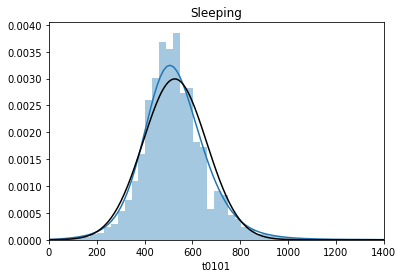

In [39]:
code = '0101'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 1400

mu, std = norm.fit(df_p, loc=500, scale=100)
x = np.linspace(xmin, xmax, 201)
d = norm.pdf(x, mu, std)

p = sns.distplot(df_p / normf, kde=True, kde_kws={'bw':50}, norm_hist=True)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])
#p.set(yscale='log')

plt.plot(x, d, color='black')

print mu / 60, std / 60, df_p.median() / 60

plt.show()

2.61852079436 19.6905537637 45.0


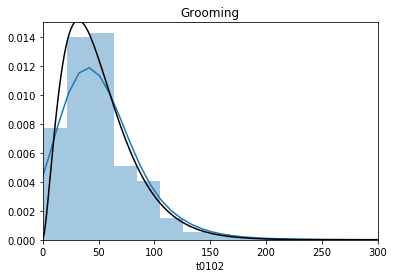

In [40]:
code = '0102'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 300

shape, loc, scale = gamma.fit(df_p, 2.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=True, kde_kws={'bw':20}, norm_hist=True)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

0.381569151461 216.537624762 10.0


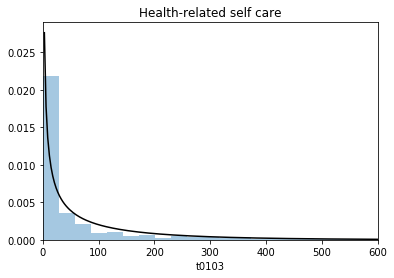

In [41]:
code = '0103'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 600

shape, loc, scale = gamma.fit(df_p, 0.5, floc=0, scale=100)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])
#p.set(yscale='log')

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.11473875442 93.1813025227 70.0


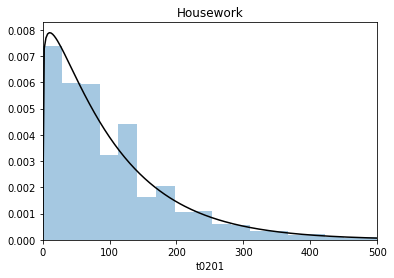

In [42]:
code = '0201'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 500

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.31646068412 48.1494348034 45.0


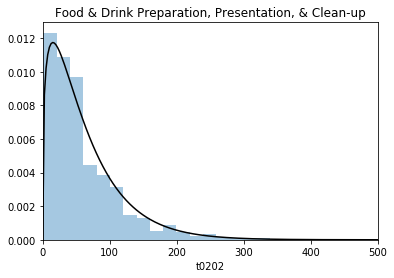

In [43]:
code = '0202'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 500

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

0.941275943278 121.16451057 79.0


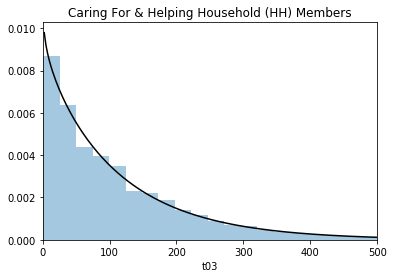

In [44]:
code = '03'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 500

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


10.3499875082 4.79142123974 7.75


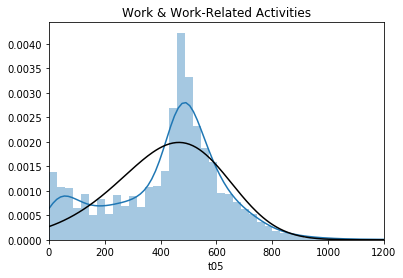

In [45]:
code = '05'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 1200

shape, mu, std = skewnorm.fit(df_p, -.5, loc=500, scale=10)
x = np.linspace(xmin, xmax, 201)
d = skewnorm.pdf(x, shape, mu, std)

p = sns.distplot(df_p / normf, kde=True, kde_kws={'bw':50}, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])
#p.set(yscale='log')

plt.plot(x, d, color='black')

print mu / 60, std / 60, df_p.median() / 60

plt.show()

1.18954253268 94.3781713151 75.0


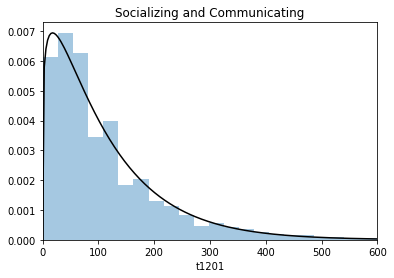

In [46]:
code = '1201'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 600

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.68476008706 155.916949638 210.0


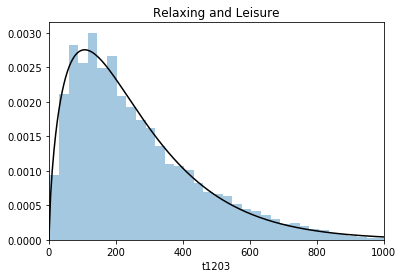

In [47]:
code = '1203'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 1000

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

2.5701441699 62.3865288534 135.0


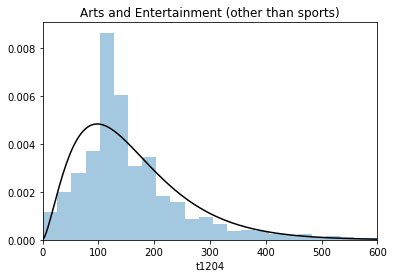

In [48]:
code = '1204'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 600

shape, loc, scale = gamma.fit(df_p, 2.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=40)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.54030814068 62.6896445997 60.0


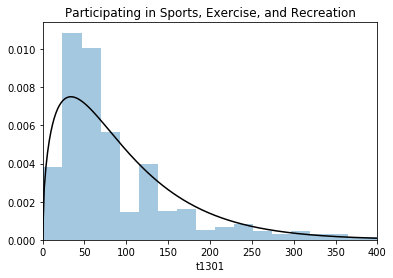

In [49]:
code = '1301'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 400

shape, loc, scale = gamma.fit(df_p, 2.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=50)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.61252872799 66.4144441993 88.0


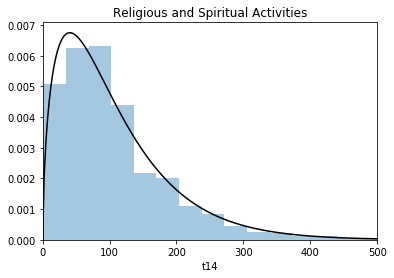

In [50]:
code = '14'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 500

shape, loc, scale = gamma.fit(df_p, 2.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=30)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.4622077088 29.9623355572 30.0


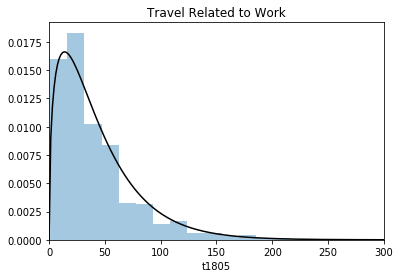

In [51]:
code = '1805'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 300

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=80)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

1.08411596481 37.0904909716 25.0


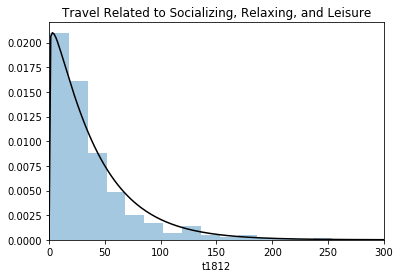

In [52]:
code = '1812'
df_p = df[(df.TEAGE >= 18) & (df['t{}{}'.format(code, postfix)] != 0)]['t{}{}'.format(code, postfix)].dropna()

xmin, xmax = 0, 300

shape, loc, scale = gamma.fit(df_p, 1.0, floc=0, scale=10)
x = np.linspace(xmin, xmax, 201)
d = gamma.pdf(x, shape, loc, scale)

p = sns.distplot(df_p / normf, kde=False, norm_hist=True, bins=80)
p.set(xlim=(xmin, xmax), title=dfactcodes[dfactcodes.CODE == code].NAME.values[0])

plt.plot(x, d, color='black')

print shape, scale, df_p.median()

plt.show()

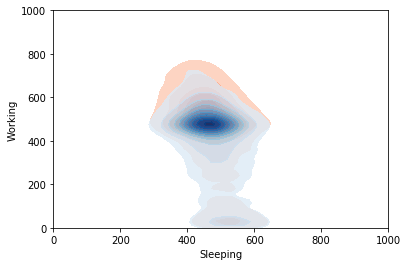

In [53]:
# Multivariant plot - Sleep and Work
codeX = '0101'
codeY = '0501'
df_p_M = df[(df.TEAGE >= 18) &
          (df.TESEX == 1) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

df_p_F = df[(df.TEAGE >= 18) &
          (df.TESEX == 2) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

xmin, xmax = 0, 1000
ymin, ymax = 0, 1000

p = sns.kdeplot(df_p_M['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_M['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Reds", shade=True, shade_lowest=False, bw=20)
p = sns.kdeplot(df_p_F['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_F['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Blues", shade=True, shade_lowest=False, bw=20, alpha=0.8)
p.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
p.set(xlabel=dfactcodes[dfactcodes.CODE == codeX].NAME.values[0],
      ylabel=dfactcodes[dfactcodes.CODE == codeY].NAME.values[0])

plt.show()

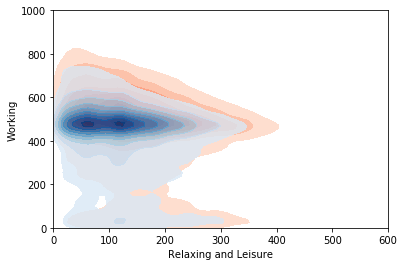

In [54]:
# Multivariant plot - Relax/Leisure and Work
codeX = '1203'
codeY = '0501'
df_p_M = df[(df.TEAGE >= 18) &
          (df.TESEX == 1) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

df_p_F = df[(df.TEAGE >= 18) &
          (df.TESEX == 2) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

xmin, xmax = 0, 600
ymin, ymax = 0, 1000

p = sns.kdeplot(df_p_M['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_M['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Reds", shade=True, shade_lowest=False)
p = sns.kdeplot(df_p_F['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_F['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Blues", shade=True, shade_lowest=False, alpha=0.8)
p.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
p.set(xlabel=dfactcodes[dfactcodes.CODE == codeX].NAME.values[0],
      ylabel=dfactcodes[dfactcodes.CODE == codeY].NAME.values[0])

plt.show()

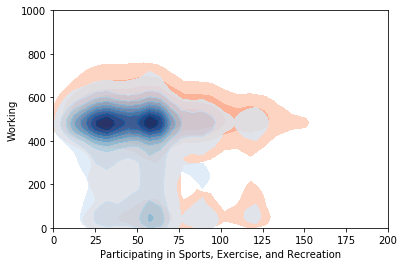

In [55]:
# Multivariant plot - Sport/Exercise and Work
codeX = '1301'
codeY = '0501'
df_p_M = df[(df.TEAGE >= 18) &
            (df.TESEX == 1) &
            (df['t{}{}'.format(codeX, postfix)] != 0) &
            (df['t{}{}'.format(codeY, postfix)] != 0)]

df_p_F = df[(df.TEAGE >= 18) &
            (df.TESEX == 2) &
            (df['t{}{}'.format(codeX, postfix)] != 0) &
            (df['t{}{}'.format(codeY, postfix)] != 0)]

xmin, xmax = 0, 200
ymin, ymax = 0, 1000

p = sns.kdeplot(df_p_M['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_M['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Reds", shade=True, shade_lowest=False)
p = sns.kdeplot(df_p_F['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_F['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Blues", shade=True, shade_lowest=False, alpha=0.8)
p.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
p.set(xlabel=dfactcodes[dfactcodes.CODE == codeX].NAME.values[0],
      ylabel=dfactcodes[dfactcodes.CODE == codeY].NAME.values[0])

plt.show()

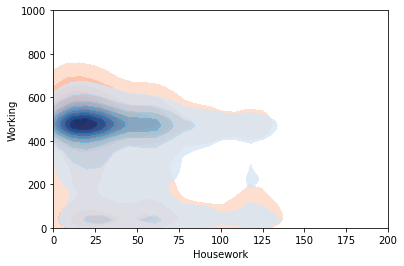

In [56]:
# Multivariant plot - Housework and Work
codeX = '0201'
codeY = '0501'
df_p_M = df[(df.TEAGE >= 18) &
          (df.TESEX == 1) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

df_p_F = df[(df.TEAGE >= 18) &
          (df.TESEX == 2) &
          (df['t{}{}'.format(codeX, postfix)] != 0) &
          (df['t{}{}'.format(codeY, postfix)] != 0)]

xmin, xmax = 0, 200
ymin, ymax = 0, 1000

p = sns.kdeplot(df_p_M['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_M['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Reds", shade=True, shade_lowest=False)
p = sns.kdeplot(df_p_F['t{}{}'.format(codeX, postfix)].dropna(),
                df_p_F['t{}{}'.format(codeY, postfix)].dropna(),
                cmap="Blues", shade=True, shade_lowest=False, alpha=0.8)
p.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
p.set(xlabel=dfactcodes[dfactcodes.CODE == codeX].NAME.values[0],
      ylabel=dfactcodes[dfactcodes.CODE == codeY].NAME.values[0])

plt.show()